In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name):
    
    plt.plot(t_plot, x_plot, '-b', t_plot, vx_plot, '-r', t_plot, ax_plot, '-g', linewidth = 1)
    plt.ylabel('x(t), y(t), a(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: x(t), v(t), a(t)", fontsize = '16')
    plt.ylim(-10, 10)
    plt.xlim(0, 25)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(t)', 'v(t)', 'a(t)'])
    plt.show()

# ------------------------------------------------------  
    
def plot_phase_space(vx_plot, x_plot, algorithm_name):

    plt.plot(vx_plot, x_plot, '-b', linewidth = 1)
    plt.title(f"{algorithm_name}: x(v)", fontsize = '16')
    plt.ylabel('v(t)', fontsize = '14')
    plt.xlabel('x(t)', fontsize = '14')

    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['x(v)'])
    #plt.gca().set_aspect('equal')
    plt.show()

# ------------------------------------------------------

def plot_total_energy(t_plot, E_plot, algorithm_name):
    
    plt.plot(t_plot, E_plot, '-b', linewidth = 1)
    plt.ylabel('E(t)', fontsize = '14')
    plt.xlabel('t', fontsize = '14')
    plt.title(f"{algorithm_name}: Total Energy", fontsize = '16')
    #plt.ylim(12.45, 12.55)
    plt.xlim(0, 100)
    plt.grid(color='grey', linestyle='--', linewidth=0.2)
    plt.legend(['E(t)'])
    plt.show()

In [13]:
def acc_ho(position, k, m):
    acc = -(k/m)*position
    return acc

In [15]:
def acc_dho(position, velocity, k, m, b):
    acc = -(k/m)*position - b*velocity
    return acc

In [25]:
def ho_verlet_vel_integrator(acc_function, k, m, x_old, v_old, a_old, dt):
    x_new = x_old+dt*v_old+0.5*dt*dt*a_old
    a_new = acc_function(x_new, k, m)
    v_new = v_old+0.5*dt*(a_old+a_new)
    return x_new, v_new, a_new

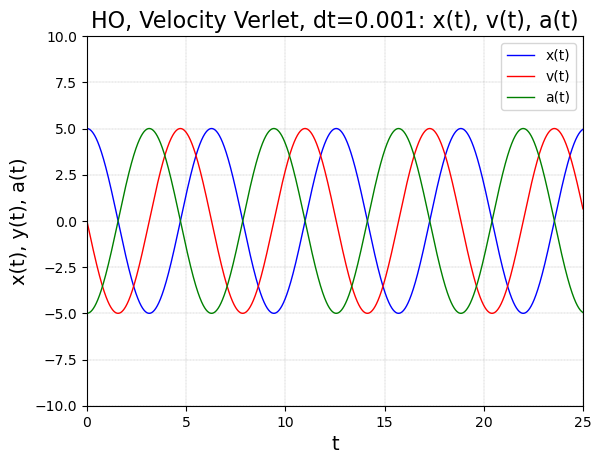

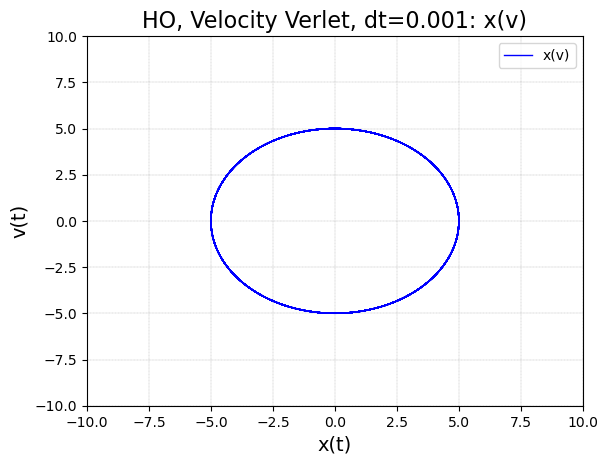

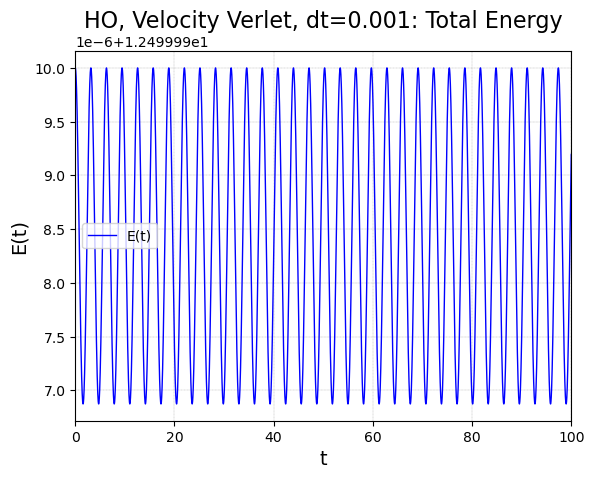

In [31]:
dt=0.001
A=5
k=1
m=1
f=1;
t=np.arange(0, 100, dt)

x_new = A
v_new = 0
a_new = acc_ho(x_new, k, m)

x_vel = []
vx_vel = []
ax_vel = []

x_vel.append(x_new)
vx_vel.append(v_new)
ax_vel.append(a_new)

save_x = open(f"x.txt", "w")
save_x.write(f"{str(round(x_new, 4))};\n")

for i in range(1, len(t)):
    x_old = x_new
    v_old = v_new
    a_old = a_new

    x_new, v_new, a_new = ho_verlet_vel_integrator(acc_ho, k, m, x_old, v_old, a_old, dt)

    x_vel.append(x_new)
    ax_vel.append(a_new)
    vx_vel.append(v_new)

    save_x.write(f"{str(round(x_new, 4))};\n")

save_x.close()

EK_vel = []
EP_vel = []
EC_vel = []
EI_vel = []

for i in range(len(t)):
    EK_vel.append(0.5*m*vx_vel[i]**2)
    EP_vel.append(0.5*k*(x_vel[i]**2))
    EC_vel.append(EK_vel[i]+EP_vel[i])
    EI_vel.append(EC_vel[0])
    
dH = np.sqrt(np.mean(np.power(np.subtract(EI_vel, EC_vel), 2)))

t_plot = t.copy()
x_plot = x_vel.copy()
vx_plot = vx_vel.copy()
ax_plot = ax_vel.copy()
E_plot = EC_vel.copy()

algorithm_name = f"HO, Velocity Verlet, dt={dt}"

plot_xva(t_plot, x_plot, vx_plot, ax_plot, algorithm_name)
plot_phase_space(vx_plot, x_plot, algorithm_name)
plot_total_energy(t_plot, E_plot, algorithm_name)

In [29]:
EC_vel

[12.5,
 12.499999999996875,
 12.499999999987498,
 12.499999999971873,
 12.499999999949996,
 12.499999999921872,
 12.499999999887498,
 12.499999999846874,
 12.4999999998,
 12.499999999746874,
 12.499999999687503,
 12.499999999621881,
 12.499999999550013,
 12.499999999471894,
 12.499999999387533,
 12.499999999296918,
 12.49999999920006,
 12.499999999096952,
 12.4999999989876,
 12.499999998872,
 12.499999998750152,
 12.49999999862206,
 12.499999998487723,
 12.499999998347144,
 12.499999998200323,
 12.499999998047258,
 12.499999997887953,
 12.499999997722405,
 12.499999997550619,
 12.499999997372589,
 12.49999999718832,
 12.499999996997811,
 12.499999996801067,
 12.499999996598088,
 12.49999999638887,
 12.49999999617342,
 12.499999995951729,
 12.499999995723808,
 12.49999999548965,
 12.499999995249262,
 12.499999995002643,
 12.499999994749796,
 12.499999994490718,
 12.499999994225412,
 12.49999999395388,
 12.499999993676118,
 12.499999993392136,
 12.49999999310193,
 12.4999999928055,
 12.4